In [1]:
import os
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import numpy as np

In [2]:
cwd= os.getcwd()
print(cwd)

C:\Users\Azharul Islam\Desktop\term


In [3]:
file_name='dew2.nc'
era_path= os.path.join(cwd, file_name)
print(era_path)

C:\Users\Azharul Islam\Desktop\term\dew2.nc


In [4]:
ds=xr.open_dataset(os.path.join(era_path))

In [5]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 21, latitude: 29, time: 87720)
Coordinates:
  * longitude  (longitude) float32 88.0 88.25 88.5 88.75 ... 92.5 92.75 93.0
  * latitude   (latitude) float32 27.0 26.75 26.5 26.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1940-01-01 ... 2022-12-31T23:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-24 01:41:01 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
ds.d2m.attrs['units']='C'

In [7]:
ds.d2m.values = ds.d2m.values - 273

In [8]:
ds.d2m.values

array([[[ 3.015564 ,  4.742157 ,  7.503784 , ...,  2.2145996,
          4.5977783,  5.07959  ],
        [ 5.8159485,  7.200592 ,  8.984161 , ...,  6.8456726,
          7.3510437,  7.9179688],
        [ 7.6869507,  7.5782776,  8.007629 , ..., 11.005615 ,
         11.128723 , 11.071747 ],
        ...,
        [14.682983 , 14.705017 , 14.865356 , ..., 14.157867 ,
         12.277008 , 11.390137 ],
        [14.519592 , 14.533264 , 14.575836 , ..., 14.177612 ,
         13.318115 , 12.738281 ],
        [14.622955 , 14.587982 , 14.542389 , ..., 13.714813 ,
         15.0112915, 14.181427 ]],

       [[ 2.8772583,  4.6296997,  7.4696045, ...,  2.0671692,
          4.483032 ,  5.248291 ],
        [ 5.77948  ,  7.170166 ,  9.0047   , ...,  6.939911 ,
          7.338135 ,  7.951416 ],
        [ 7.719635 ,  7.678589 ,  8.176361 , ..., 11.625732 ,
         11.633331 , 11.187988 ],
        ...,
        [14.815216 , 14.7795105, 14.969482 , ..., 14.240692 ,
         12.744354 , 12.099945 ],
        [14.

<Figure size 1200x600 with 0 Axes>

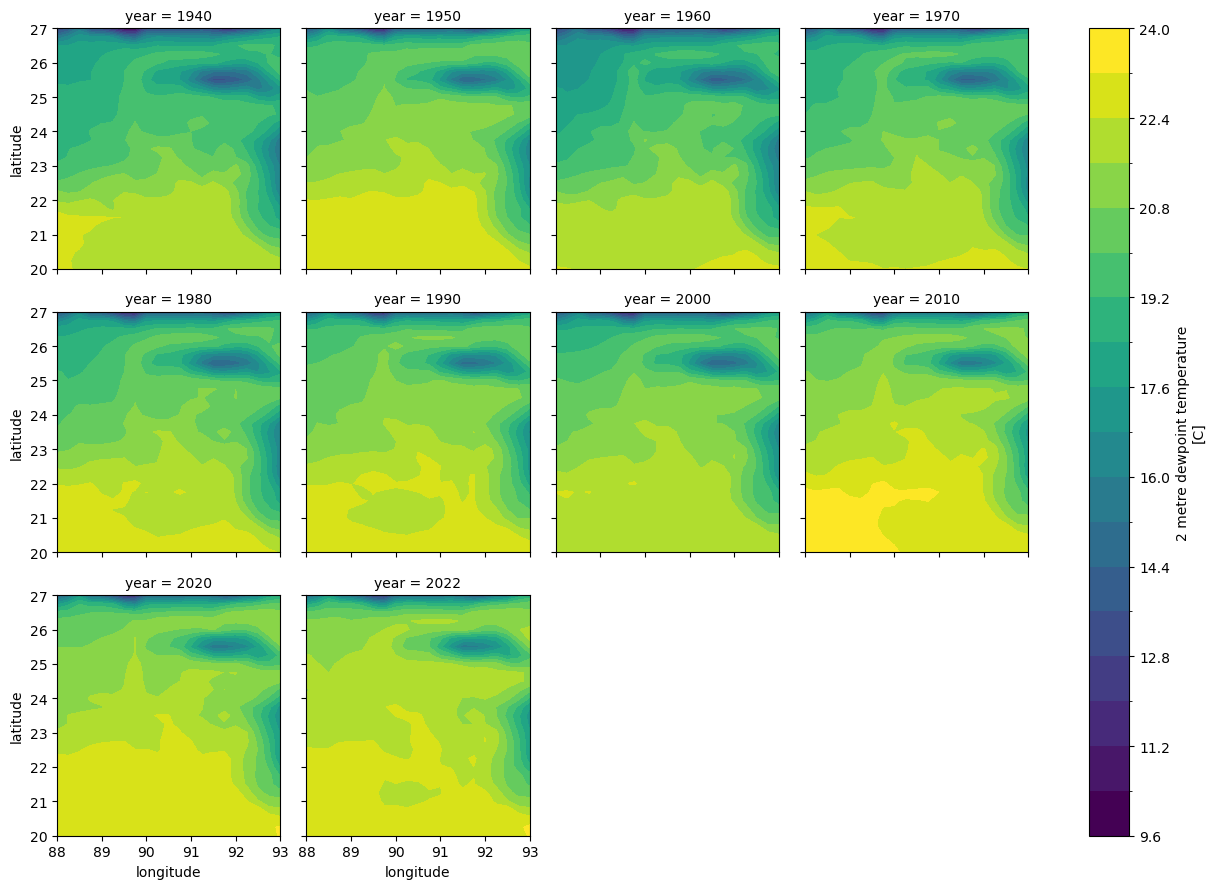

In [9]:
temperature_data = ds['d2m']
# Calculate the mean along the 'time' dimension to get year-wise means
yearly_mean = temperature_data.groupby('time.year').mean(dim='time')

# Assuming 'time' is in datetime format, you can also use 'time.year' to group by years

# Create a contour plot of the year-wise mean temperature data
plt.figure(figsize=(12, 6))
yearly_mean.plot.contourf(x='longitude', y='latitude', col='year', col_wrap=4, levels=20)
#plt.suptitle('Year-wise Mean Temperature (2013-2023)')
plt.show()

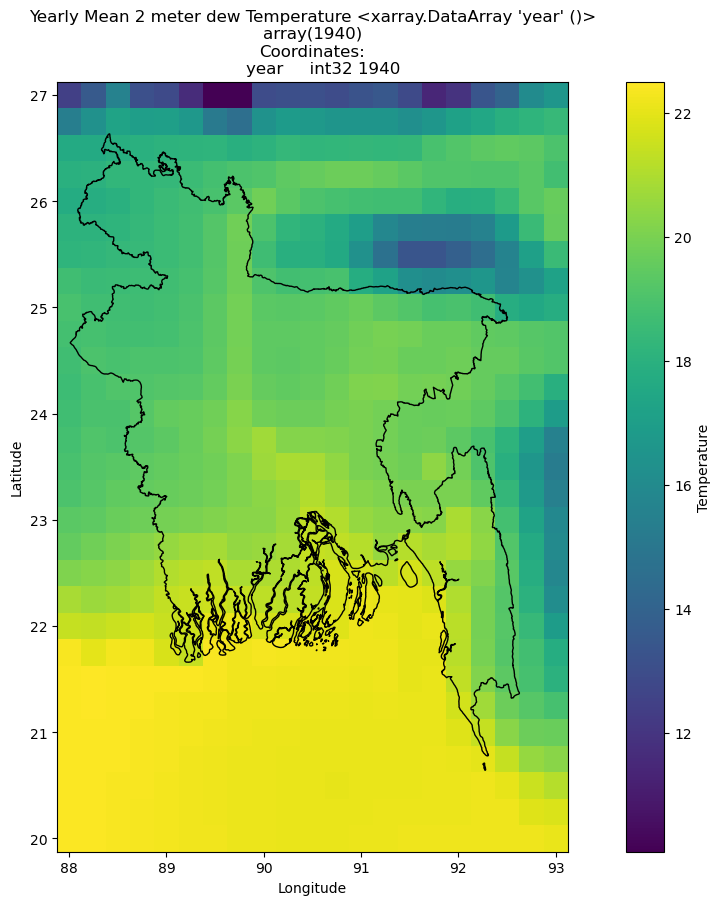

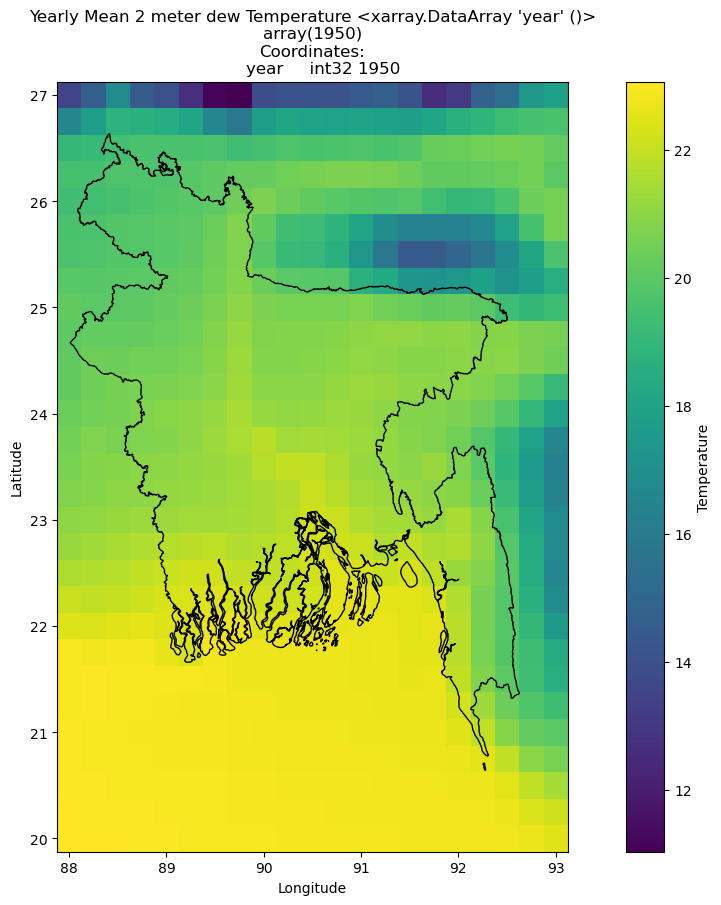

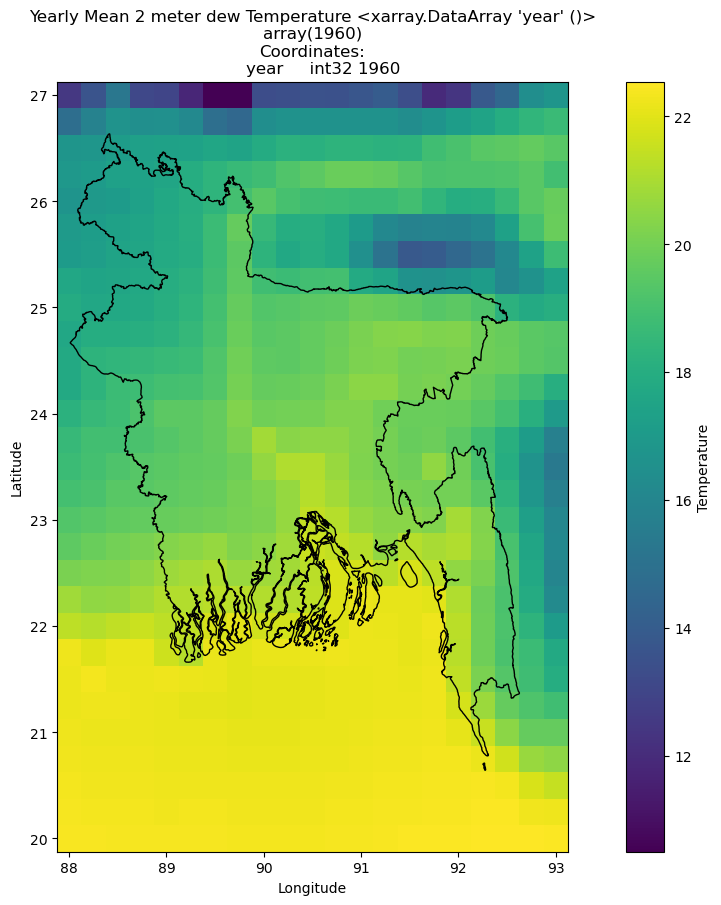

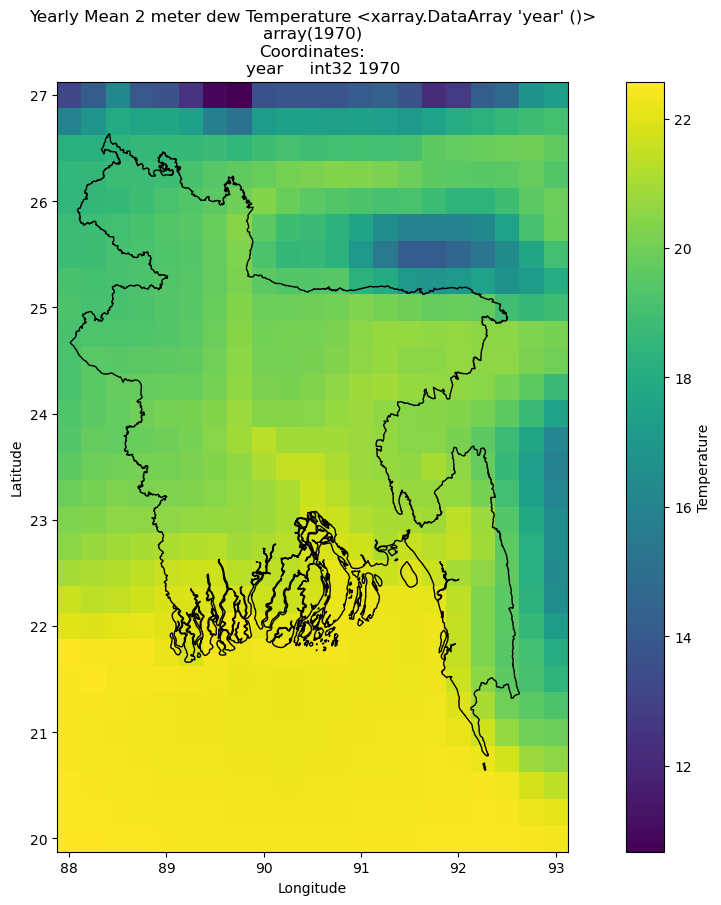

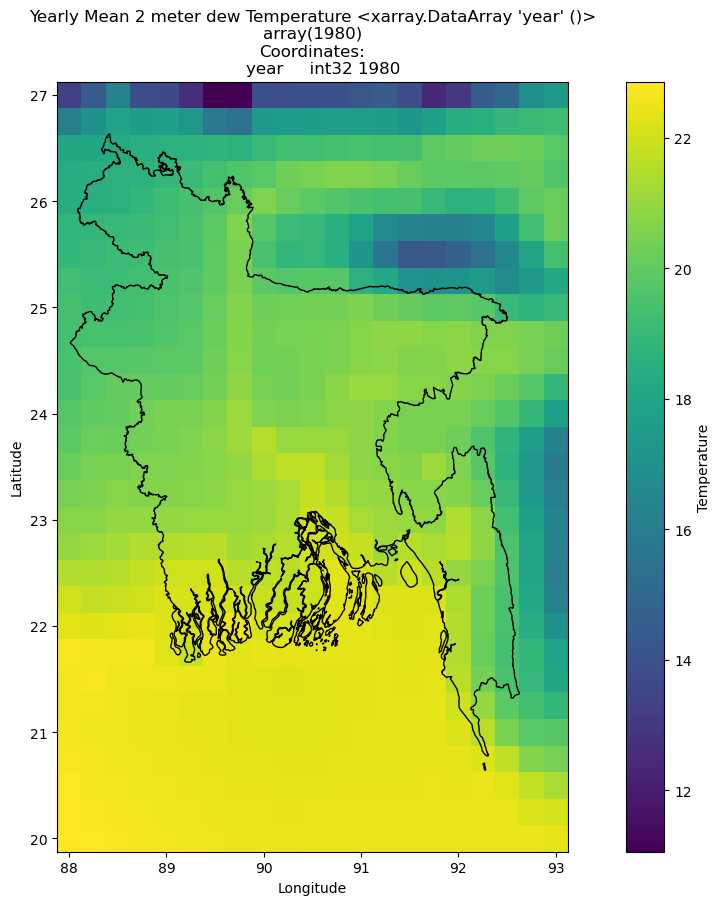

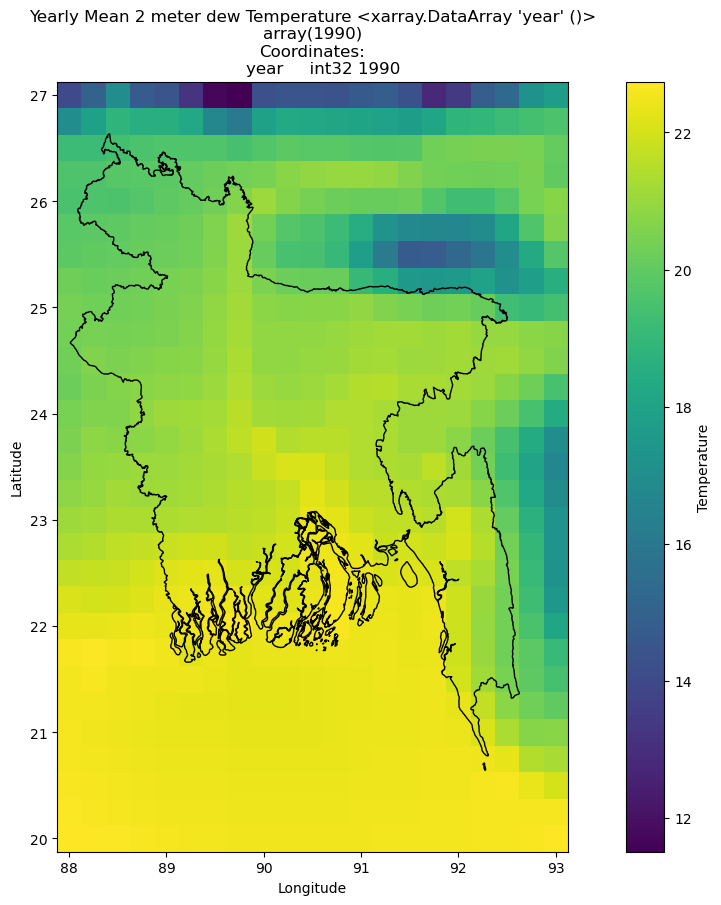

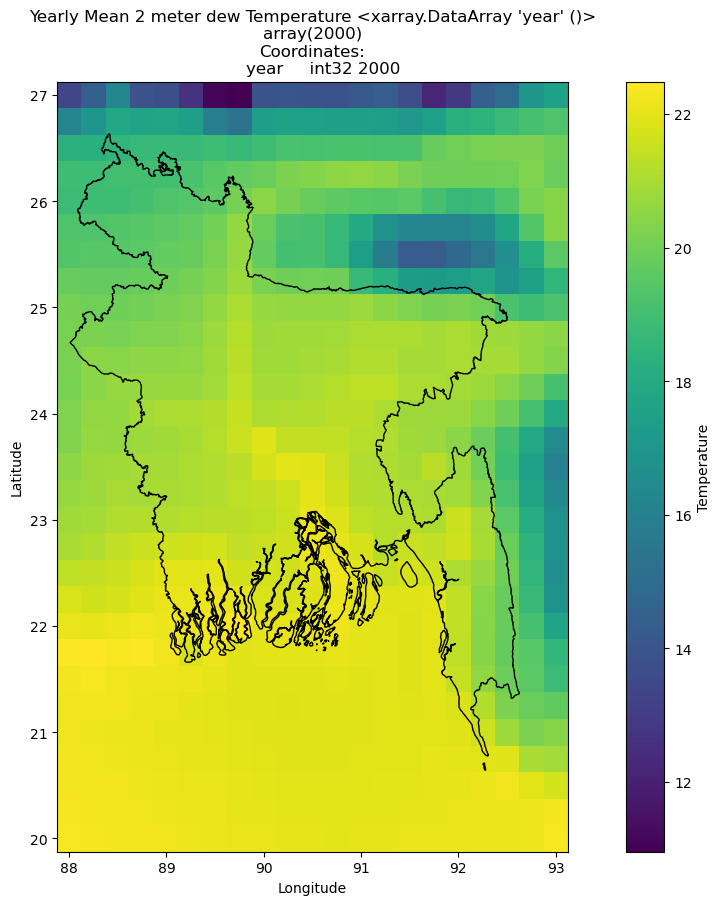

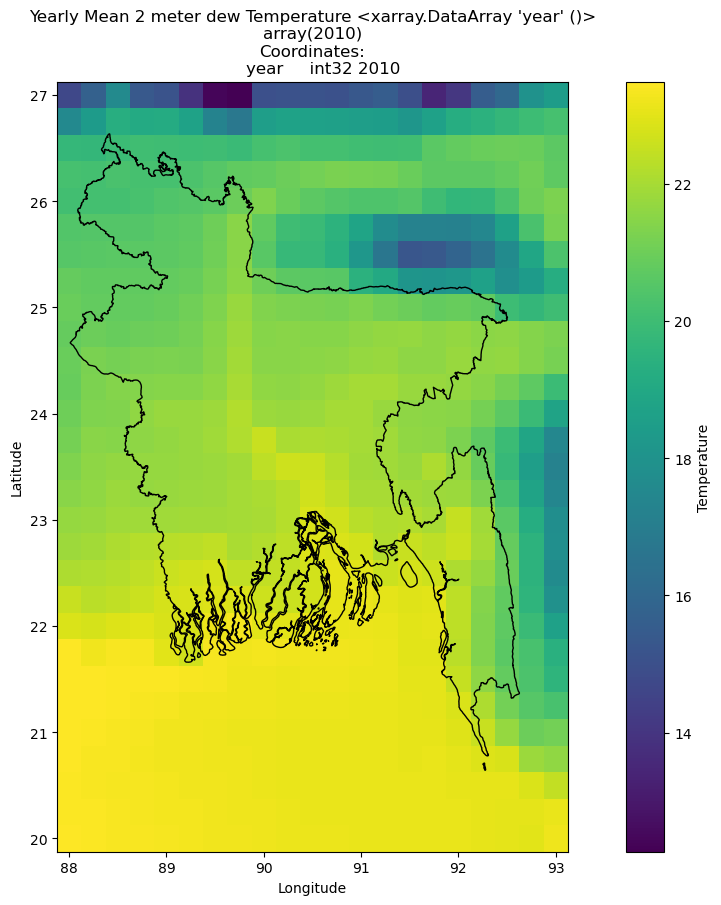

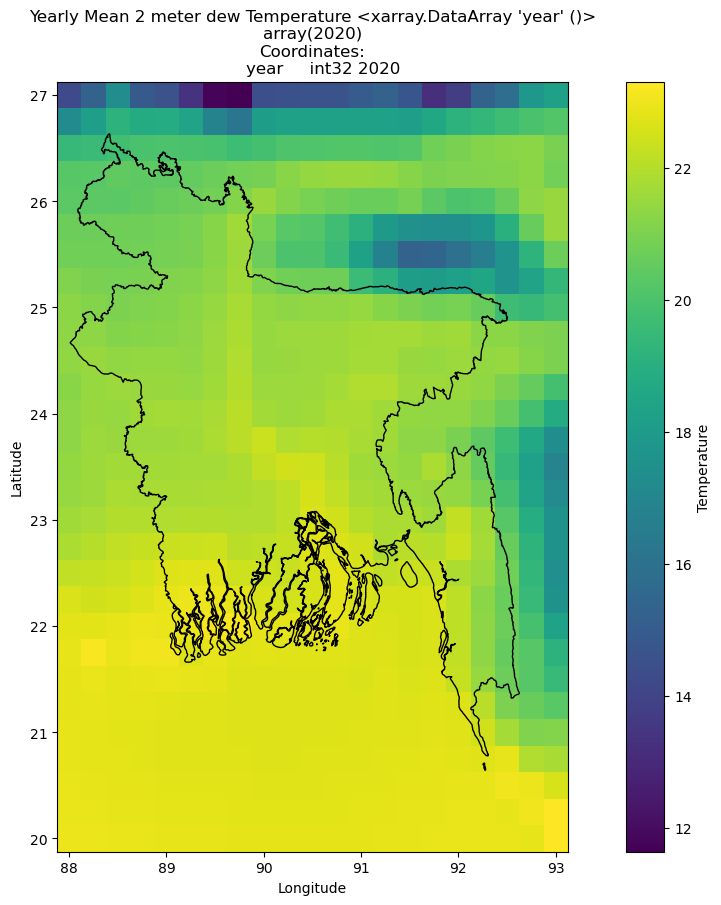

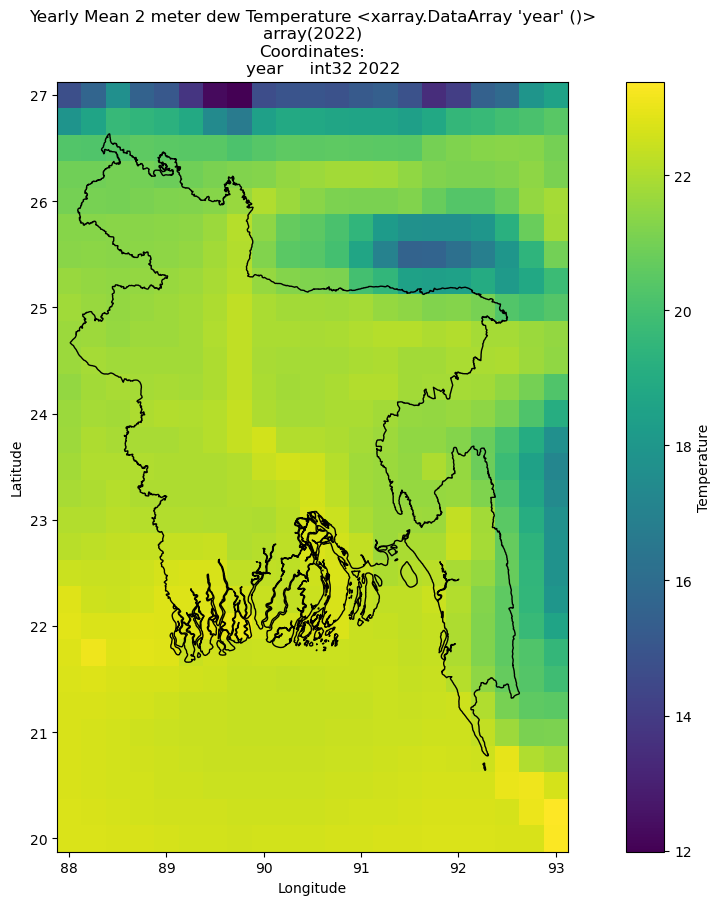

In [10]:
# Calculate yearly means
yearly_means = ds['d2m'].groupby('time.year').mean(dim='time')

# Load the shapefile
gdf = gpd.read_file('C:/Users/Azharul Islam/Desktop/3105/bangladesh/bangladesh.shp')


# Iterate through each year
for year in yearly_means['year']:
    # Select the data for the current year
    year_data = yearly_means.sel(year=year)
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(15, 10))
    

    # Plot the temperature data (adjust cmap and other settings as needed)
    
    year_data.plot(ax=ax, cbar_kwargs={'label': 'Temperature'})
    
    # Overlay the shapefile
    gdf.plot(ax=ax, color='none', edgecolor='black')
    
    # Set plot title and labels
    ax.set_title(f'Yearly Mean 2 meter dew Temperature {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    

    
    # Display the plot
    plt.show()

In [11]:
data_1940 = ds.sel(time=slice('1940-01-01', '1940-12-31'))
data_1950 = ds.sel(time=slice('1950-01-01', '1950-12-31'))
data_1960 = ds.sel(time=slice('1960-01-01', '1960-12-31'))
data_1970 = ds.sel(time=slice('1970-01-01', '1970-12-31'))
data_1980 = ds.sel(time=slice('1980-01-01', '1980-12-31'))
data_1990 = ds.sel(time=slice('1990-01-01', '1990-12-31'))
data_2000 = ds.sel(time=slice('2000-01-01', '2000-12-31'))
data_2010 = ds.sel(time=slice('2010-01-01', '2010-12-31'))
data_2020 = ds.sel(time=slice('2020-01-01', '2020-12-31'))
data_2022 = ds.sel(time=slice('2022-01-01', '2022-12-31'))


In [12]:
annual_average_1940 = data_1940.mean(dim='time')
annual_average_1950 = data_1950.mean(dim='time')
annual_average_1960 = data_1960.mean(dim='time')
annual_average_1970 = data_1970.mean(dim='time')
annual_average_1980 = data_1980.mean(dim='time')
annual_average_1990 = data_1990.mean(dim='time')
annual_average_2000 = data_2000.mean(dim='time')
annual_average_2010 = data_2010.mean(dim='time')
annual_average_2020 = data_2020.mean(dim='time')
annual_average_2022 = data_2022.mean(dim='time')

In [13]:
A_1940=annual_average_1940.mean(dim=['latitude','longitude'])
A_1950=annual_average_1950.mean(dim=['latitude','longitude'])
A_1960=annual_average_1960.mean(dim=['latitude','longitude'])
A_1970=annual_average_1970.mean(dim=['latitude','longitude'])
A_1980=annual_average_1980.mean(dim=['latitude','longitude'])
A_1990=annual_average_1990.mean(dim=['latitude','longitude'])
A_2000=annual_average_2000.mean(dim=['latitude','longitude'])
A_2010=annual_average_2010.mean(dim=['latitude','longitude'])
A_2020=annual_average_2020.mean(dim=['latitude','longitude'])
A_2022=annual_average_2022.mean(dim=['latitude','longitude'])

In [14]:
A_1940,A_1950,A_1960,A_1970,A_1980,A_1990,A_2000,A_2010,A_2020,A_2022

(<xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 19.68,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.71,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 19.64,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.17,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.33,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.76,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.39,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.33,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.2,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.35)

In [15]:
data = {
    'Year': ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020', '2022'],
    'Value': [19.68, 20.71, 19.64, 20.17, 20.33, 20.76, 20.39, 21.33, 21.2, 21.35]
}

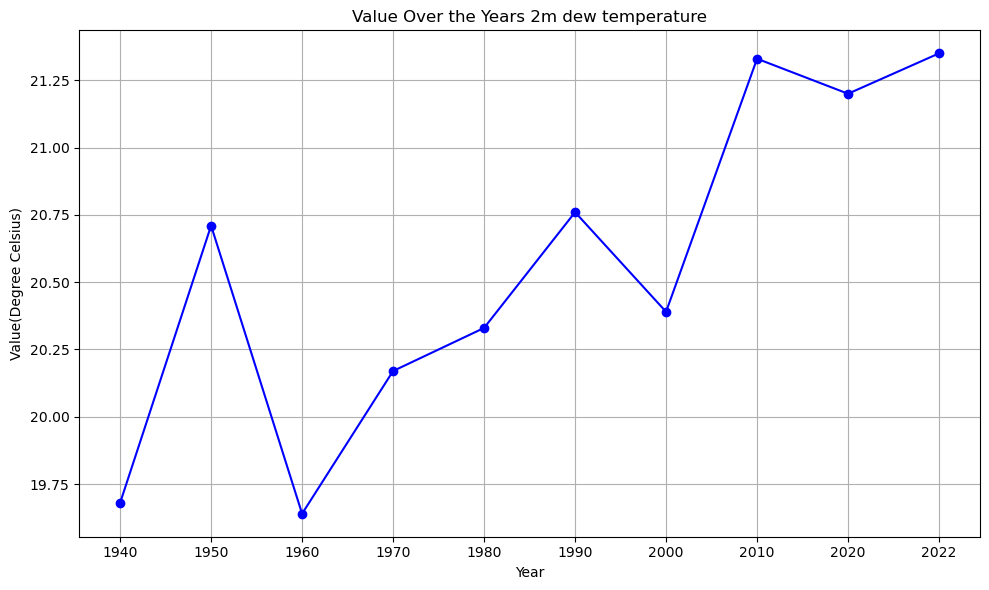

In [16]:
df = pd.DataFrame(data)


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Value'], marker='o', linestyle='-', color='b')
plt.title('Value Over the Years 2m dew temperature')
plt.xlabel('Year')
plt.ylabel('Value(Degree Celsius)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

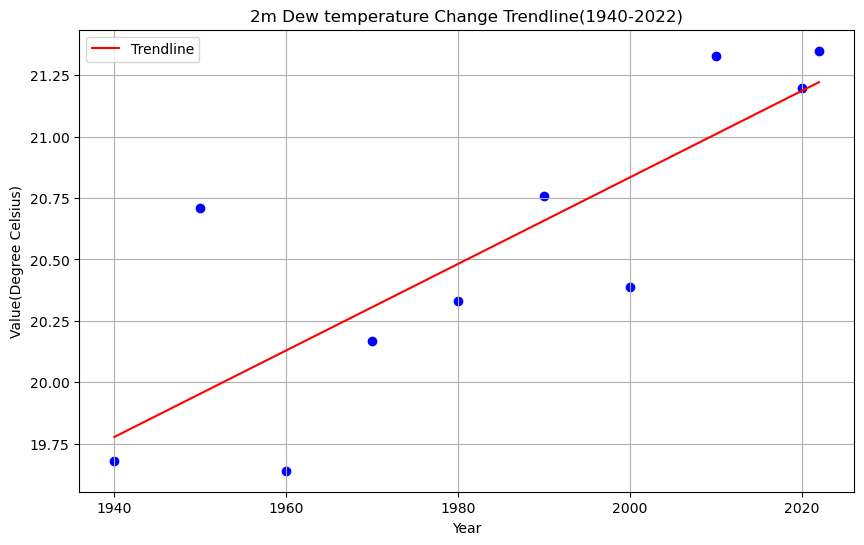

In [17]:

# Extract years and values
years = data['Year']
values = data['Value']

# Convert years to integers
years = [int(year) for year in years]

# Create a NumPy array for years and values
years_np = np.array(years)
values_np = np.array(values)

# Fit a linear trendline using numpy.polyfit
coefficients = np.polyfit(years_np, values_np, 1)
polynomial = np.poly1d(coefficients)

# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(years, values, marker='o', linestyle='-', color='b')
plt.plot(years, polynomial(years_np), label='Trendline', color='red')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value(Degree Celsius)')
plt.title('2m Dew temperature Change Trendline(1940-2022)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [18]:
yearly_mean = temperature_data.groupby('time.year').mean(dim='time')


In [19]:
A=yearly_mean.mean(dim=['latitude','longitude'])

In [20]:
A

<xarray.DataArray 'd2m' (year: 10)>
array([19.677767, 20.70925 , 19.64014 , 20.17292 , 20.325338, 20.764694,
       20.39075 , 21.32509 , 21.20287 , 21.345293], dtype=float32)
Coordinates:
  * year     (year) int32 1940 1950 1960 1970 1980 1990 2000 2010 2020 2022

In [21]:
monthly1940_avg = data_1940.groupby('time.month').mean(dim='time')
monthly1950_avg = data_1950.groupby('time.month').mean(dim='time')
monthly1960_avg = data_1960.groupby('time.month').mean(dim='time')
monthly1970_avg = data_1970.groupby('time.month').mean(dim='time')
monthly1980_avg = data_1980.groupby('time.month').mean(dim='time')
monthly1990_avg = data_1990.groupby('time.month').mean(dim='time')
monthly2000_avg = data_2000.groupby('time.month').mean(dim='time')
monthly2010_avg = data_2010.groupby('time.month').mean(dim='time')
monthly2020_avg = data_2020.groupby('time.month').mean(dim='time')
monthly2022_avg = data_2022.groupby('time.month').mean(dim='time')

In [22]:
M_1940=monthly1940_avg.mean(dim=['latitude','longitude'])
M_1950=monthly1950_avg.mean(dim=['latitude','longitude'])
M_1960=monthly1960_avg.mean(dim=['latitude','longitude'])
M_1970=monthly1970_avg.mean(dim=['latitude','longitude'])
M_1980=monthly1980_avg.mean(dim=['latitude','longitude'])
M_1990=monthly1990_avg.mean(dim=['latitude','longitude'])
M_2000=monthly2000_avg.mean(dim=['latitude','longitude'])
M_2010=monthly2010_avg.mean(dim=['latitude','longitude'])
M_2020=monthly2020_avg.mean(dim=['latitude','longitude'])
M_2022=monthly2022_avg.mean(dim=['latitude','longitude'])

In [23]:
# Assuming that `A_2013` is an xarray DataArray
M_1940_dataframe = M_1940.to_dataframe()
M_1950_dataframe = M_1950.to_dataframe()
M_1960_dataframe = M_1960.to_dataframe()
M_1970_dataframe = M_1970.to_dataframe()
M_1980_dataframe = M_1980.to_dataframe()
M_1990_dataframe = M_1990.to_dataframe()
M_2000_dataframe = M_2000.to_dataframe()
M_2010_dataframe = M_2010.to_dataframe()
M_2020_dataframe = M_2020.to_dataframe()
M_2022_dataframe = M_2022.to_dataframe()

In [24]:
# Create an empty dataframe with months and years as columns
data = {
    'Months': ['NaN','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
}
df = pd.DataFrame(data)
dataframes = [M_1940_dataframe, M_1950_dataframe, M_1960_dataframe, M_1970_dataframe, M_1980_dataframe,
              M_1990_dataframe, M_2000_dataframe, M_2010_dataframe, M_2020_dataframe, M_2022_dataframe]

# Loop through the dataframes and assign their values to the corresponding columns in df
for year, dataframe in zip(range(2010, 2020), dataframes):
    df[str(year)] = dataframe['d2m']  # Replace 'Your_Column_Name' with the actual column name you want to copy

In [25]:
df

,Months,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jan,9.563328,12.702559,11.020657,12.122619,12.500111,14.154671,13.258226,13.195419,14.229941,14.174160
2,Feb,12.809131,14.168588,13.946894,14.040931,14.177908,15.943587,13.092859,14.952830,14.504744,14.120446
3,Mar,17.989321,18.091867,15.631770,17.288923,17.840235,17.831663,17.327635,19.531614,18.295406,19.266956
4,Apr,21.164114,20.952307,18.370455,21.343119,22.131458,21.548027,21.980434,23.480835,21.295298,23.615047
5,May,23.438231,24.190948,23.114363,23.837736,23.785505,24.026463,24.117401,24.632959,23.848612,24.397036
6,Jun,24.523193,24.905832,25.168242,25.008820,25.068340,25.287952,25.086042,25.620342,25.652376,25.321339
7,Jul,24.558832,24.334700,24.805544,25.091898,25.093271,24.955097,24.934319,25.539204,25.881933,25.656109
8,Aug,24.156834,24.184170,25.285017,24.950857,25.012466,25.118279,25.120207,25.567610,25.948215,25.642572
9,Sep,23.726849,24.133999,24.699976,24.614990,24.769945,24.620081,24.403765,25.094427,25.717266,25.375940


In [26]:
data2 = {
    'Months': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    '1940': [9.563328, 12.809131, 17.989321, 21.164114, 23.438231, 24.523193, 24.558832, 24.156834, 23.726849, 22.256588, 18.732698, 13.075413],
    '1950': [12.702559, 14.168588, 18.091867, 20.952307, 24.190948, 24.905832, 24.334700, 24.184170, 24.133999, 22.890923, 20.404402, 17.161594],
    '1950': [11.020657, 13.946894, 15.631770, 18.370455, 23.114363, 25.168242, 24.805544, 25.285017, 24.699976, 22.119862, 16.925173, 14.439472],
    '1970': [12.122619, 14.040931, 17.288923, 21.343119, 23.837736, 25.008820, 25.091898, 24.950857, 24.614990, 22.751097, 17.561916, 13.121492],
    '1980': [12.500111, 14.177908, 17.840235, 22.131458, 23.785505, 25.068340, 25.093271, 25.012466, 24.769945, 22.163685, 17.000292, 14.211709],
    '1990': [14.154671, 15.943587, 17.831663, 21.548027, 24.026463, 25.287952, 24.955097, 25.118279, 24.620081, 21.776106, 19.104712, 14.585109],
    '2000': [13.258226, 13.092859, 17.327635, 21.980434, 24.117401, 25.086042, 24.934319, 25.120207, 24.403765, 23.176773, 18.498325, 13.493432],
    '2010': [13.195419, 14.952830, 19.531614, 23.480835, 24.632959, 25.620342, 25.539204, 25.567610, 25.094427, 23.798777, 19.653013, 14.493108],
    '2020': [14.229941, 14.504744, 18.295406, 21.295298, 23.848612, 25.652376, 25.881933, 25.948215, 25.717266, 24.737185, 19.047501, 15.066408],
    '2022': [14.174160, 14.120446, 19.266956, 23.615047, 24.397036, 25.321339, 25.656109, 25.642572, 25.375940, 23.343170, 18.832582, 15.949405]
}

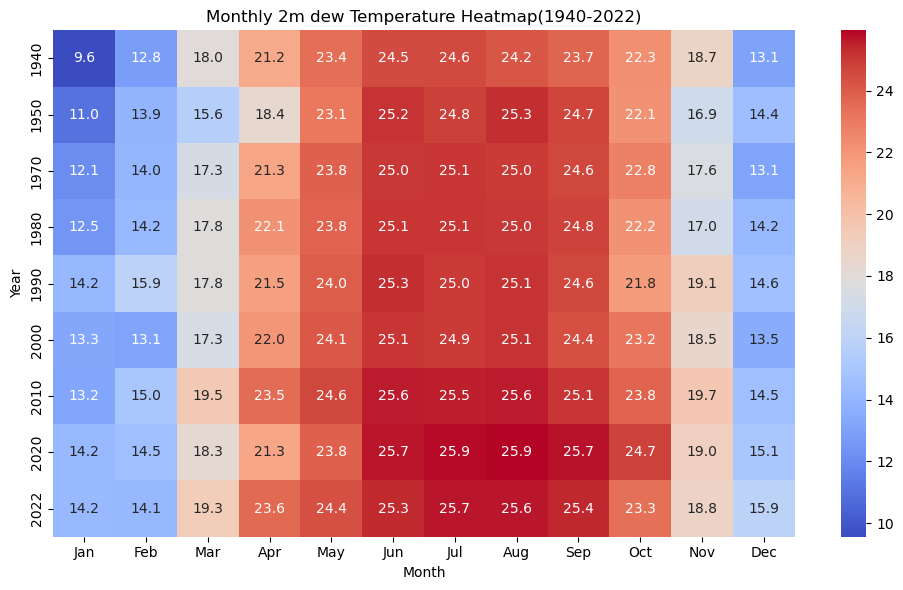

In [32]:
import seaborn as sns

df = pd.DataFrame(data2)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Months').T, cmap='coolwarm', annot=True, fmt='.1f')
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly 2m dew Temperature Heatmap(1940-2022)')
plt.tight_layout()
plt.show()

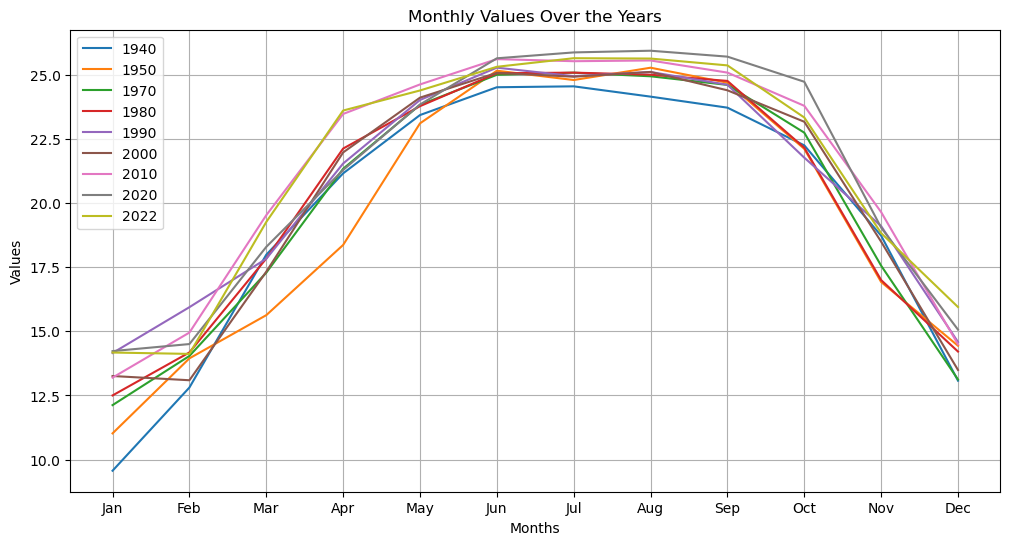

In [28]:
df = pd.DataFrame(data2)

# Set the Months column as the index
df.set_index('Months', inplace=True)

# Create a line plot
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Monthly Values Over the Years')
plt.legend(loc='upper left')
plt.grid(True)

# Display the plot
plt.show()

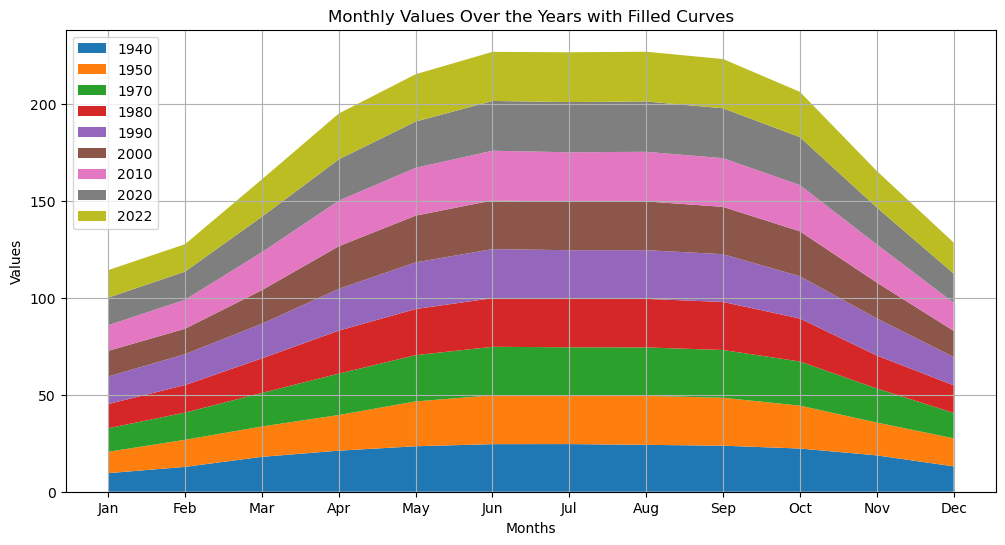

In [29]:
df = pd.DataFrame(data2)

# Set the Months column as the index
df.set_index('Months', inplace=True)

# Create an area plot with filled curves
plt.figure(figsize=(12, 6))
plt.stackplot(df.index, df.values.T, labels=df.columns)
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Monthly Values Over the Years with Filled Curves')
plt.legend(loc='upper left')
plt.grid(True)

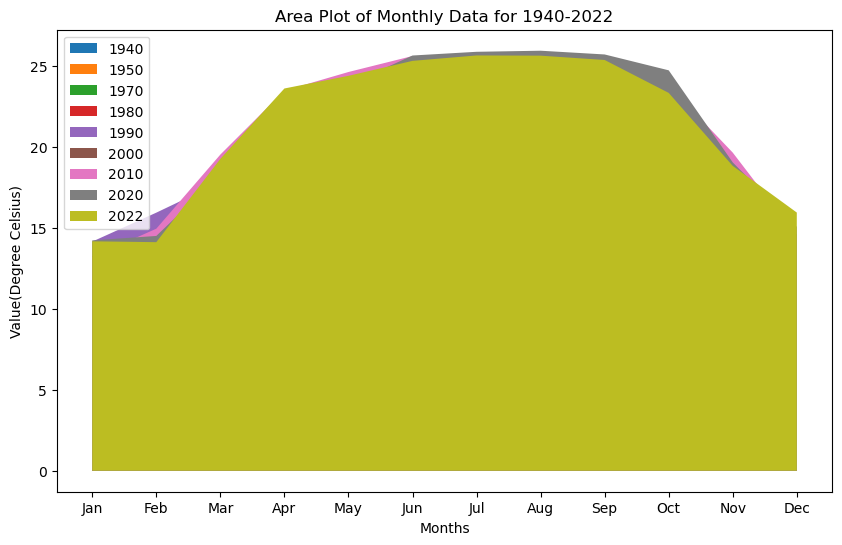

In [30]:
import matplotlib.pyplot as plt

# Specify the years you want to plot
years_to_plot = ['1940', '1950', '1970', '1980', '1990', '2000', '2010', '2020', '2022']

plt.figure(figsize=(10, 6))

for year in years_to_plot:
    plt.fill_between(data2['Months'], data2[year], label=str(year))

plt.xlabel('Months')
plt.ylabel('Value(Degree Celsius)')
plt.title('Area Plot of Monthly Data for 1940-2022')
plt.legend(loc='upper left')
plt.show()


In [31]:
yearly_mean = temperature_data.groupby('time.month').mean(dim='time')
B=yearly_mean.mean(dim=['latitude','longitude'])
B

<xarray.DataArray 'd2m' (month: 12)>
array([12.692174, 14.167559, 17.909536, 21.588114, 23.938925, 25.16425 ,
       25.085089, 25.098621, 24.715717, 22.901411, 18.576063, 14.55971 ],
      dtype=float32)
Coordinates:
  * month    (month) int32 1 2 3 4 5 6 7 8 9 10 11 12